# Uswatul Auliya Murtadina

# Final Project DTS 2019 : 
## Observasi data IPM dan Tingkat Kemiskinan di Indonesia tahun 2018
### Sumber: BPS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model, metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import norm

In [2]:
data=pd.read_excel("dataproject.xlsx")
data.head()

,Provinsi,Tingkat kemiskinan,IPM
0,ACEH,0.67222,11
1,SUMATERA UTARA,0.39861,12
2,SUMATERA BARAT,0.28819,9
3,RIAU,0.30625,6
4,JAMBI,0.35069,17


In [3]:
np.mean(data['Tingkat kemiskinan'])

0.457229411764706

In [4]:
np.median(data['Tingkat kemiskinan'])

0.39618

Jadi, rata-rata Tingkat kemiskinan pada masing-masing provinsi di Indonesia tahun 2018 sebesar 0.457 dengan median 0.396. 

In [5]:
np.mean(data['IPM'])

17.5

In [6]:
np.median(data['IPM'])

17.5

Jadi, rata-rata Indeks Pembangunan Manusia (IPM) pada masing-masing provinsi di Indonesia tahun 2018 sebesar 17.5 dan nilai median sebesar 0.396. 

In [7]:
def mean():
    a = str(round(sum(data['Tingkat kemiskinan']) / len(data['Tingkat kemiskinan']), 2))
    print('Mean data adalah ', a)
    return

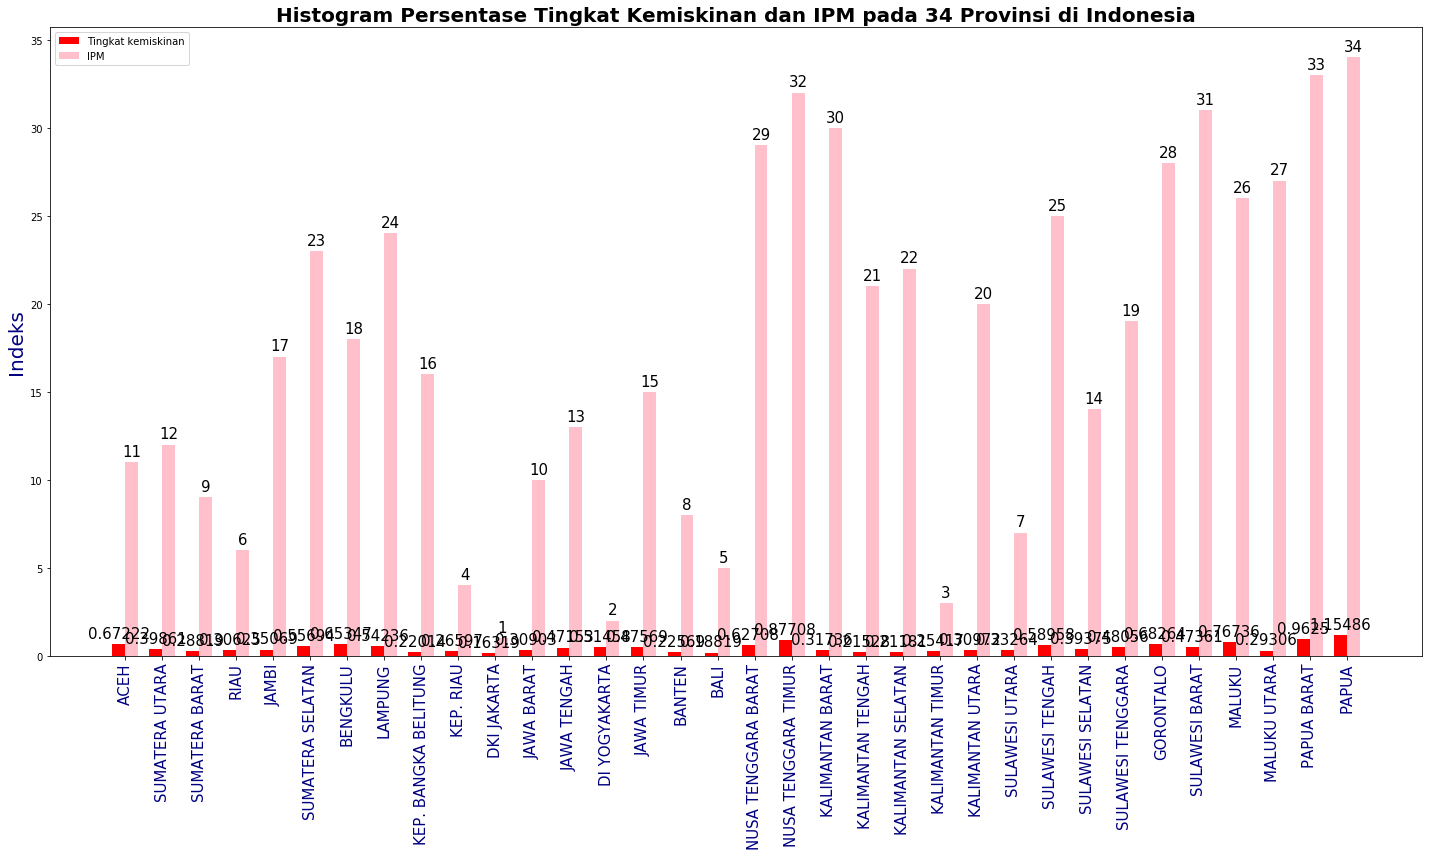

In [8]:
labels = data['Provinsi']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,12))
rects1 = ax.bar(x - width/2, data['Tingkat kemiskinan'], width, label='Tingkat kemiskinan', color='red')
rects2 = ax.bar(x + width/2, data['IPM'], width, label='IPM', color='pink')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Indeks', fontsize=20, color='navy')
ax.set_title('Histogram Persentase Tingkat Kemiskinan dan IPM pada 34 Provinsi di Indonesia', fontsize=20, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=90,fontsize=15,color='navy')
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=15)


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Dari Grafik tersebut, dapat diketahui bahwa Provinsi yang memiliki tingkat kemiskinan paling rendah yaitu DKI Jakarta sebesar 0.163. Provinsi yang memiliki tingkat kemiskinan paling tinggi yaitu Papua sebesar 1.1548. Sedangkan, Indeks Pembangunan Manusia paling rendah pada provinsi Jakarta yaitu sebesar 1 dan paling tinggi pada provinsi papua yaitu sebesar 34.

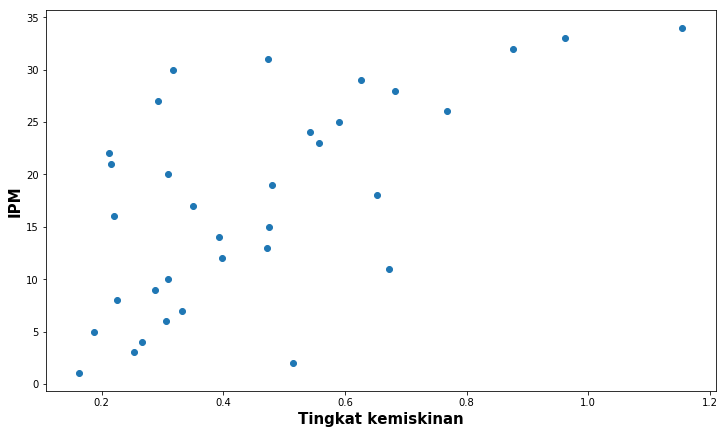

In [9]:
fig, ax= plt.subplots(figsize=(12,7))
ax.scatter(data['Tingkat kemiskinan'], data['IPM'])
#ax.set_title('Histogram Indeks Pembangunan Manusia 34 Provinsi di Indonesia')
ax.set_ylabel('IPM',fontsize=15, fontweight='bold')
ax.set_xlabel('Tingkat kemiskinan', fontsize=15, fontweight='bold')
plt.show()

In [10]:
data.count()

Provinsi              34
Tingkat kemiskinan    34
IPM                   34
dtype: int64

In [11]:
np.sum(data.isnull())

Provinsi              0
Tingkat kemiskinan    0
IPM                   0
dtype: int64

Jadi, data yang digunakan yaitu data tingkat kemiskinan dan IPM  masing-masing provinsi di Indonesia yang berjumlah 34 data. Data ini tidak terdapat missing value.

# Identifikasi data outlier

In [12]:
import numpy as np

IPM=data['IPM']
Tingkat=data['Tingkat kemiskinan']

meanIPM=np.mean(IPM)
meanTingkat=np.mean(Tingkat)
stdIPM=np.std(IPM)
stdTingkat=np.std(Tingkat)

#dataClean=data[(np.abs((data['IPM']-meanIPM)/stdIPM)<=3)
               #& (np.abs((data['Tingkat Kemiskinan']-meanTingkat)/stdTingkat)<=3)]

In [13]:
dataClean=data[(np.abs((data['Tingkat kemiskinan']-meanTingkat)/stdTingkat)<=3)
               & (np.abs((data['IPM']-meanIPM)/stdIPM)<=3)]

In [47]:
#dataClean

In [14]:
dataClean.count()

Provinsi              34
Tingkat kemiskinan    34
IPM                   34
dtype: int64

Data Tingkat kemiskinan dan IPM masing-masing provinsi di Indonesia tahun 2018 tidak memiliki outlier

# Observasi

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\legend.py:449: UserWarning: The handle <matplotlib.patches.Patch object at 0x0000028EBB5EFF28> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


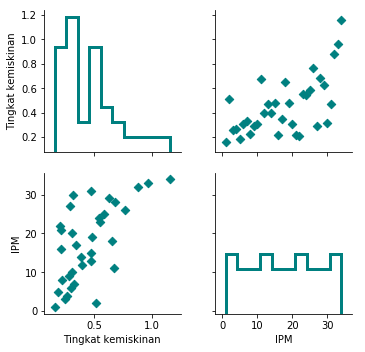

In [15]:
visual=sns.PairGrid(dataClean,hue_kws={"marker": ["D"]})
visual.map_diag(plt.hist,histtype="step",color='teal', linewidth=3)
visual.map_offdiag(plt.scatter,color='teal')
visual.add_legend()
plt.show()

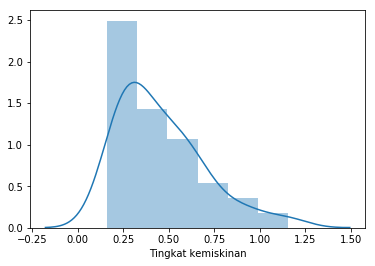

In [16]:
sns.distplot(data['Tingkat kemiskinan'])

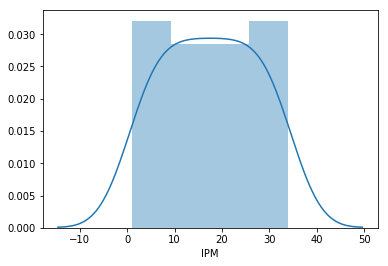

In [17]:
sns.distplot(data['IPM'])

Karena data Tingkat kemiskinan dan IPM tidak normal maka perlu dilakukan normalisasi data

# Normalisasi data

In [18]:
normalx =dataClean['Tingkat kemiskinan']/max(dataClean['Tingkat kemiskinan'])
normaly =dataClean['IPM']/max(dataClean['IPM'])

# Regresi Polinomial

POLINOMIAL: b0 = 0.162904, b1 = 0.840842, b2 = 0.177495, b3 = -0.135325 


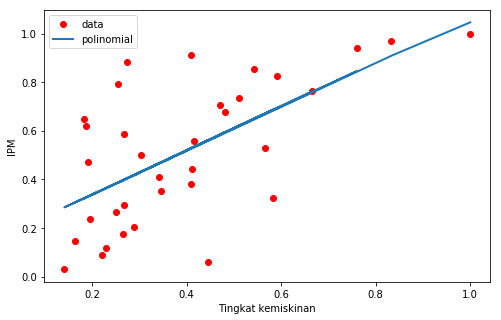

In [19]:
def polinomial(x, b0, b1,b2,b3):
    y = b0+(b1*x)+(b2*(x**2))+(b3*(x**3))
    return y
popt, pcov = curve_fit(polinomial, normalx, normaly)
print("POLINOMIAL: b0 = %f, b1 = %f, b2 = %f, b3 = %f " % (popt[0], popt[1], popt[2], popt[3]))
x = dataClean['Tingkat kemiskinan']/max(dataClean['Tingkat kemiskinan'])
plt.figure(figsize=(8,5))
y = polinomial(x, *popt)
plt.plot(normalx, normaly, 'ro', label='data')
plt.plot(x,y, linewidth=2.0, label='polinomial')
plt.legend(loc='best')
plt.ylabel('IPM')
plt.xlabel('Tingkat kemiskinan')
plt.show()

In [20]:
X=np.array(normalx).reshape(-1,1)
Y=np.array(normaly).reshape(-1,1)
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.20,random_state=123)
popt, pcov = curve_fit(polinomial, X_train.ravel(), y_train.ravel())
y_topi = polinomial(X_test, *popt)
print('MSE: %.4f' % np.mean((y_topi-y_test)**2))
print('R-sq: %.4f' % r2_score(y_topi, y_test))

MSE: 0.0370
R-sq: 0.0446


# Regresi Sigmoid

 b1 = 4.037660, b2 = 0.374483


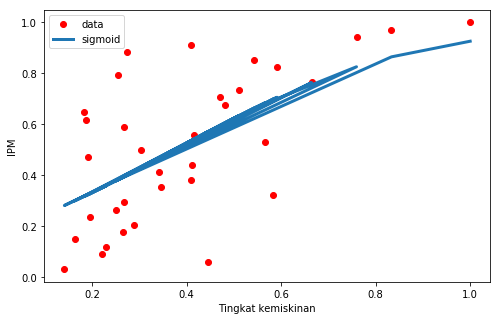

In [21]:
def sigmoid(x, b1, b2):
    y = 1 / (1 + np.exp(-b1*(x-b2)))
    return y
popt, pcov = curve_fit(sigmoid, normalx, normaly)
print(" b1 = %f, b2 = %f" % (popt[0], popt[1]))
x = dataClean['Tingkat kemiskinan']/max(dataClean['Tingkat kemiskinan'])
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(normalx, normaly, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='sigmoid')
plt.legend(loc='best')
plt.ylabel('IPM')
plt.xlabel('Tingkat kemiskinan')
plt.show()

In [22]:
X=np.array(normalx).reshape(-1,1)
Y=np.array(normaly).reshape(-1,1)
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.20,random_state=123)
popt, pcov = curve_fit(sigmoid, X_train.ravel(), y_train.ravel())
y_topi = sigmoid(X_test, *popt)
print('MSE: %.4f' % np.mean((y_topi-y_test)**2))
print('R-sq: %.4f' % r2_score(y_topi, y_test))

MSE: 0.0378
R-sq: 0.0358


# Regresi Eksponensial

 b1 = 0.284212, b2 = 1.397880


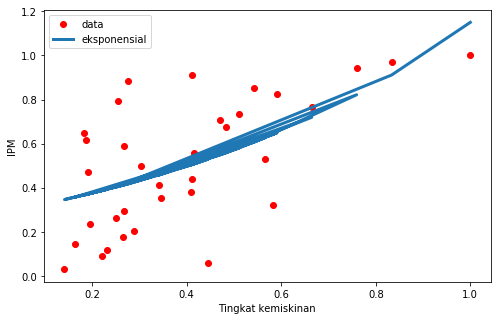

In [23]:
def eksponensial(x, b0, b1):
    y = b0*np.exp(b1*x)
    return y
popt, pcov = curve_fit(eksponensial, normalx, normaly)
print(" b1 = %f, b2 = %f" % (popt[0], popt[1]))
x = dataClean['Tingkat kemiskinan']/max(dataClean['Tingkat kemiskinan'])
plt.figure(figsize=(8,5))
y = eksponensial(x, *popt)
plt.plot(normalx, normaly, 'ro', label='data',)
plt.plot(x,y, linewidth=3.0, label='eksponensial')
plt.legend(loc='best')
plt.ylabel('IPM')
plt.xlabel('Tingkat kemiskinan')
plt.show()

In [24]:
Y=np.array(normaly).reshape(-1,1)
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.20,random_state=123)
popt, pcov = curve_fit(eksponensial, X_train.ravel(), y_train.ravel())
y_topi = eksponensial(X_test, *popt)
print('MSE: %.2f' % np.mean((y_topi-y_test)**2))
print('R-sq: %.2f' % r2_score(y_topi, y_test))

MSE: 0.04
R-sq: -0.50


# Regresi linear

 b1 = 0.158164, b2 = 0.900547


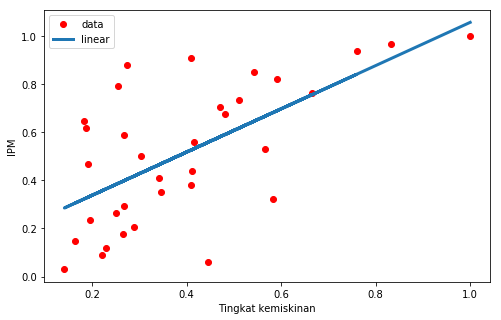

In [25]:
def linear(x, b0, b1):
    y = b0+(b1*x)
    return y
popt, pcov = curve_fit(linear, normalx, normaly)
print(" b1 = %f, b2 = %f" % (popt[0], popt[1]))
x = np.linspace(1960, 2015, 55)
x = dataClean['Tingkat kemiskinan']/max(dataClean['Tingkat kemiskinan'])
plt.figure(figsize=(8,5))
y = linear(x, *popt)
plt.plot(normalx, normaly, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='linear')
plt.legend(loc='best')
plt.ylabel('IPM')
plt.xlabel('Tingkat kemiskinan')
plt.show()

In [26]:
X=np.array(normalx).reshape(-1,1)
Y=np.array(normaly).reshape(-1,1)
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.20,random_state=123)
popt, pcov = curve_fit(linear, X_train.ravel(), y_train.ravel())
y_topi = linear(X_test, *popt)
print('MSE: %.2f' % np.mean((y_topi-y_test)**2))
print('R-sq: %.2f' % r2_score(y_topi, y_test))

MSE: 0.04
R-sq: 0.02


# Evaluasi Model

1. Regresi Linear => MSE: 0.04, R-sq: 0.02
2. Regresi Polinomial => MSE: 0.0370, R-sq: 0.0446
3. Regresi Eksponensial => MSE: 0.04, R-sq: -0.05
4. Regresi Sigmoid => MSE: 0.0378, R-sq: 0.0358

Jadi, model terbaik untuk studi kasus ini menggunakan Regresi Polinomial dengan nilai MSE paling rendah sebesar 0.0370 dan nilai R-sq sebesar 0.0446 atau 4.46%. Dapat diartikan bahwa tingkat kemiskinan berpengaruh sebesar 4.46% terhadap nilai IPM pada masing-masing provinsi di Indonesia tahun 2018.

# K-Means Clustering

In [27]:
data = data.filter(items=['Tingkat kemiskinan', 'IPM'])
data.head()

,Tingkat kemiskinan,IPM
0,0.67222,11
1,0.39861,12
2,0.28819,9
3,0.30625,6
4,0.35069,17


In [28]:
X=data.values

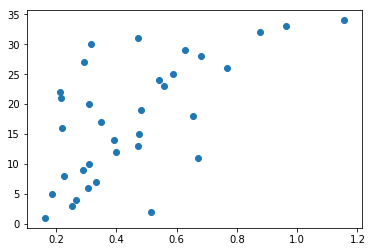

In [29]:
plt.scatter(data['Tingkat kemiskinan'], data['IPM'])

In [30]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

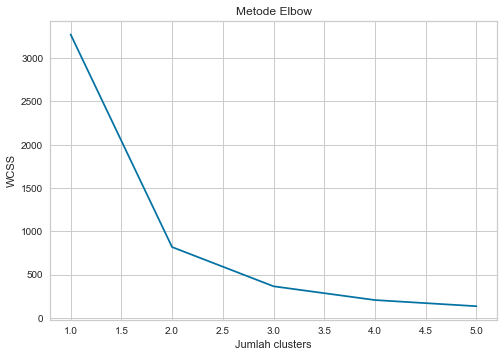

In [31]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 6), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

Dari grafik tersebut, dapat dilihat bahwa bentuk elbow (siku) terlihat saat jumlah kluster adalah 2, 3 dan 4.

# k=4

In [32]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 123)
y_kmeans = kmeans.fit_predict(X)
print(kmeans.cluster_centers_)

[[ 0.403645 12.5     ]
 [ 0.68395  30.      ]
 [ 0.281335  4.5     ]
 [ 0.43449  21.      ]]


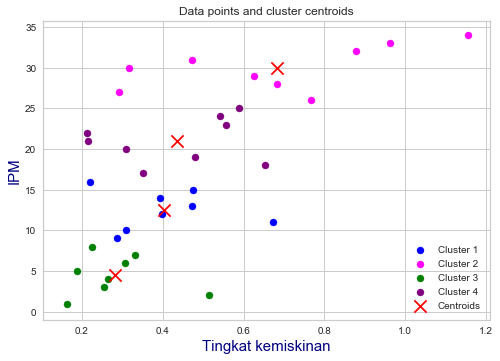

In [33]:
# Visualisasi hasil clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'magenta', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'purple', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'red', marker='x', label = 'Centroids')
plt.title('Data points and cluster centroids')
plt.xlabel('Tingkat kemiskinan', fontsize=15, color='navy')
plt.ylabel('IPM',fontsize=15, color='navy')
plt.legend()
plt.show()

In [34]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(X, kmeans.labels_))

0.5210978493738619


# k=3

In [35]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 123)
y_kmeans = kmeans.fit_predict(X)
print(kmeans.cluster_centers_)

[[ 0.66249909 29.        ]
 [ 0.32001091  6.        ]
 [ 0.39484917 17.5       ]]


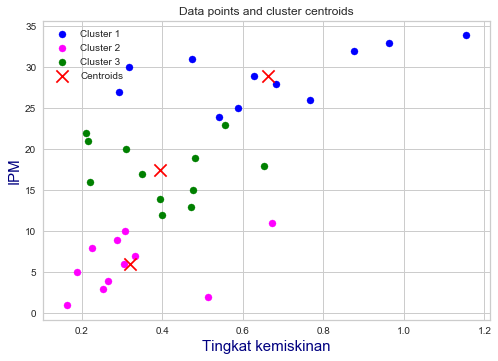

In [36]:
# Visualisasi hasil clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'magenta', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'red', marker='x', label = 'Centroids')
plt.title('Data points and cluster centroids')
plt.xlabel('Tingkat kemiskinan', fontsize=15, color='navy')
plt.ylabel('IPM',fontsize=15, color='navy')
plt.legend()
plt.show()

In [37]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(X, kmeans.labels_))

0.5537783732111419


# k=2

In [38]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 123)
y_kmeans = kmeans.fit_predict(X)
print(kmeans.cluster_centers_)

[[ 0.34297235  9.        ]
 [ 0.57148647 26.        ]]


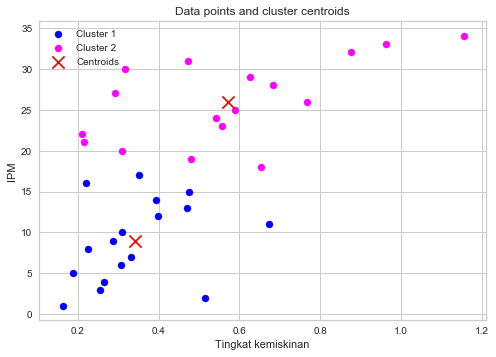

In [39]:
# Visualisasi hasil clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'magenta', label = 'Cluster 2')
#plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'red', marker='x', label = 'Centroids')
plt.title('Data points and cluster centroids')
plt.xlabel('Tingkat kemiskinan')
plt.ylabel('IPM')
plt.legend()
plt.show()

In [40]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(X, kmeans.labels_))

0.6046242880828169


Dari perhitungan tersebut diperoleh silhoutte score pada masing-masing nilai k.
1. k=4 -> SC=0.5210
2. k=3 -> SC=0.5537
3. K=2 -> SC=0.6046

Berdasarkan hasil tersebut diperoleh kesimpulan bahwa clustering data tingkat kemiskinan dan IPM di Indonesia menggunakan metode k-means menghasilkan 2 cluster yaitu tinggi dan rendah. Provinsi yang termasuk dalam cluster tinggi yaitu 
1. 